In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('../data/train/train-words.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [14]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(150, 11), return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20


2023-03-14 21:40:45.640028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:40:45.641807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:40:45.643188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - ETA: 0s - loss: 2.2946 - accuracy: 0.2782

2023-03-14 21:40:53.526736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:40:53.528865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:40:53.530458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - 8s 90ms/step - loss: 2.2946 - accuracy: 0.2782 - val_loss: 1.8150 - val_accuracy: 0.4608
Epoch 2/20
66/66 [==============================] - 5s 82ms/step - loss: 1.5641 - accuracy: 0.5430 - val_loss: 1.3185 - val_accuracy: 0.6347
Epoch 3/20
66/66 [==============================] - 5s 80ms/step - loss: 1.1810 - accuracy: 0.6758 - val_loss: 1.0188 - val_accuracy: 0.7282
Epoch 4/20
66/66 [==============================] - 5s 80ms/step - loss: 0.9311 - accuracy: 0.7554 - val_loss: 0.8171 - val_accuracy: 0.7856
Epoch 5/20
66/66 [==============================] - 5s 80ms/step - loss: 0.7489 - accuracy: 0.8056 - val_loss: 0.6560 - val_accuracy: 0.8256
Epoch 6/20
66/66 [==============================] - 5s 79ms/step - loss: 0.5938 - accuracy: 0.8406 - val_loss: 0.5246 - val_accuracy: 0.8574
Epoch 7/20
66/66 [==============================] - 5s 73ms/step - loss: 0.4877 - accuracy: 0.8662 - val_loss: 0.4467 - val_accuracy: 0.8781
Epoch 8/20
66/66 [======

In [15]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 150, 64)           19456     
                                                                 
 dense_5 (Dense)             (None, 150, 14)           910       
                                                                 
Total params: 20,366
Trainable params: 20,366
Non-trainable params: 0
_________________________________________________________________


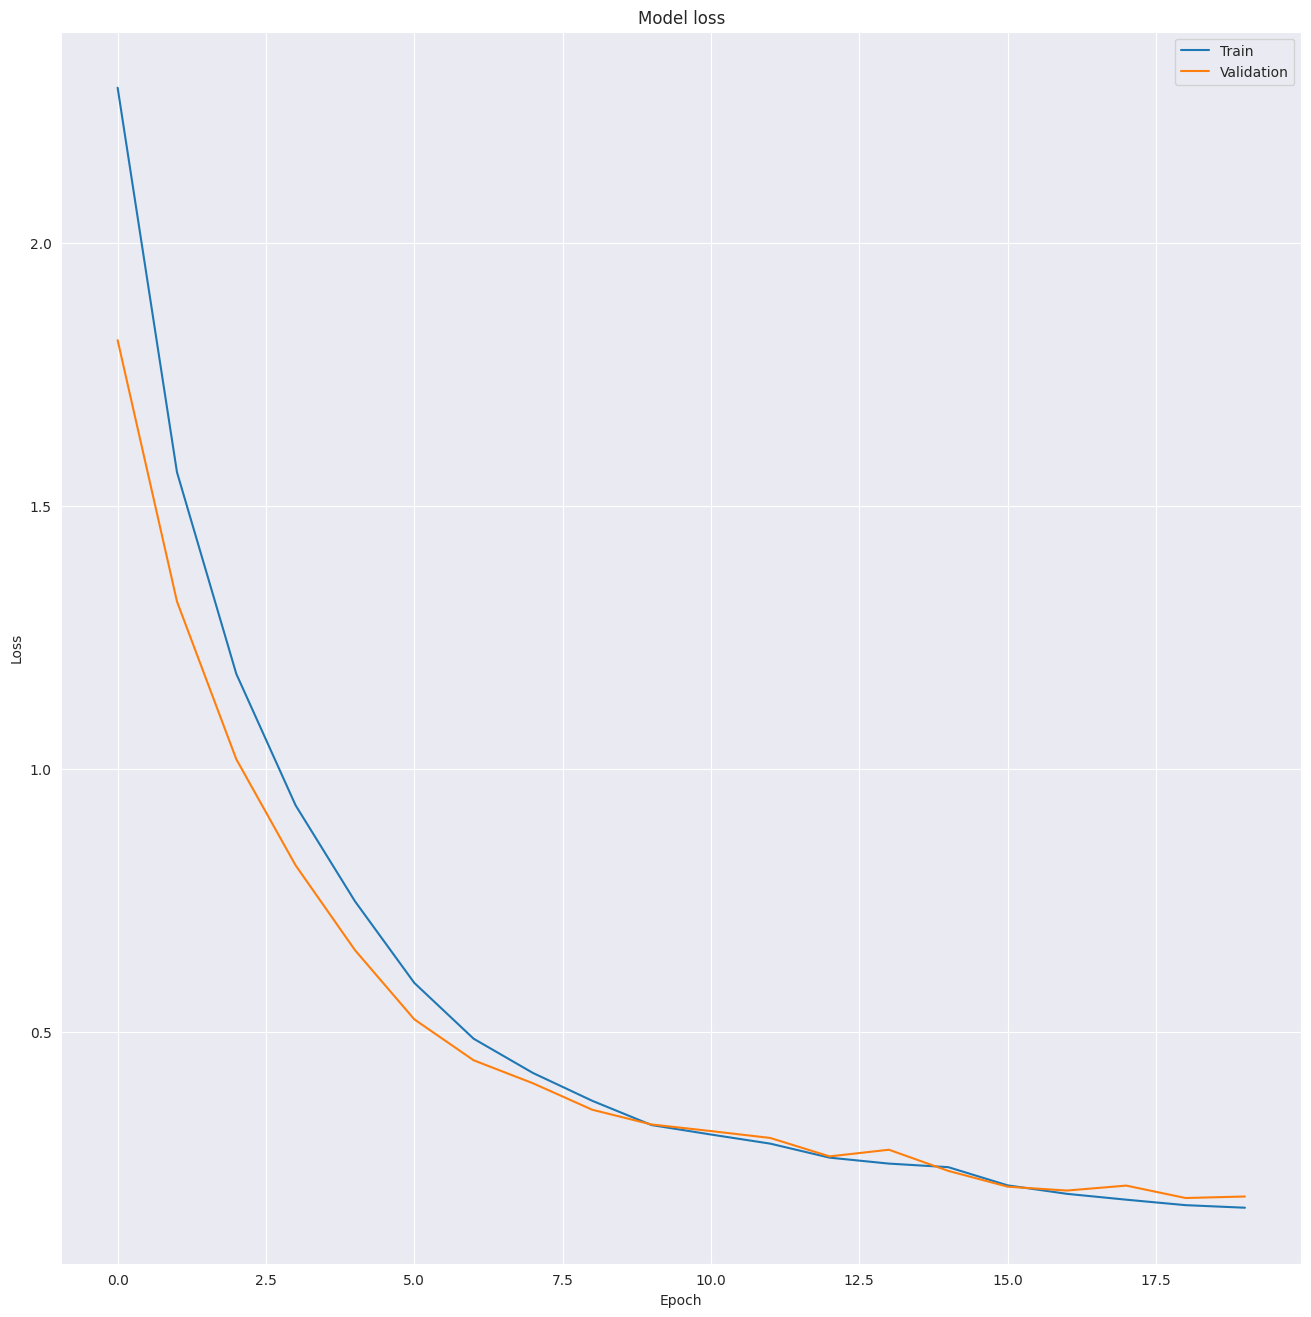

In [16]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

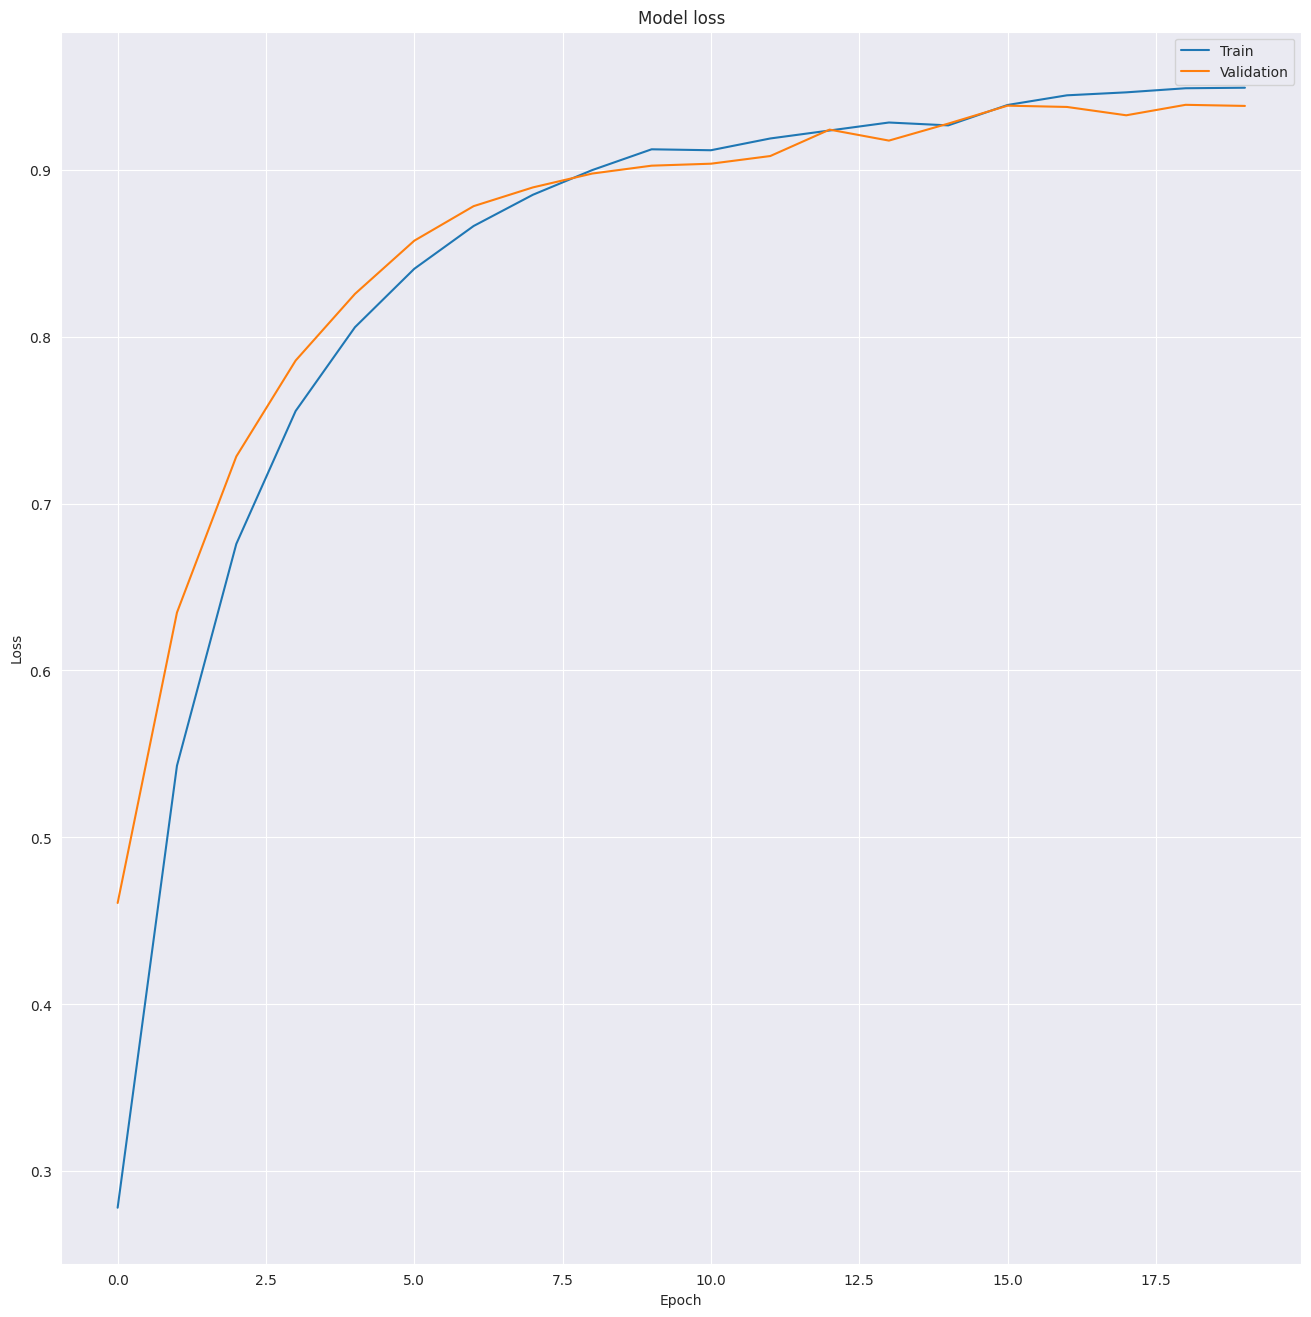

In [17]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
model.save('../models/words.h5')